In [21]:
%matplotlib inline
from simulation import *
from math import *

wavelength = 13.0
NA = 0.9
# sigma = NA
# M = (NA + sigma)/NA
sigma = 0
M = 1
pitch = 16
grid_info_1d = grid_info_1d_s.create_grid_info_bloch_mode([16], wavelength, sigma, NA, [[-pitch/2], [pitch/2]], 1e-6)
print(grid_info_1d)
grid_info_2d = grid_info_2d_s.create_grid_info_bloch_mode([16, 16], wavelength, sigma, NA, [[-pitch/2, -pitch/2], [pitch/2, pitch/2]], 1e-6)
print(grid_info_2d)

freq_step, = grid_info_1d.fourier.step

* grid info                   
--------------------------------
tilesize      :  [16]         
spatial start :  [-8]         
spatial step  :  [1]          
fourier start :  [0]          
fourier step  :  [0.902778]   
coords place  :  |*--|corner  

* grid info                           
----------------------------------------
tilesize      :  [16,16]              
spatial start :  [-8,-8]              
spatial step  :  [1,1]                
fourier start :  [0,0]                
fourier step  :  [0.902778,0.902778]  
coords place  :  |*--|corner          



In [22]:
print(f"simulation system's fourier step is {freq_step}")
sp = source_point_s()
grid_index = [1, 0]
sp.sigmaxy = [n  * freq_step for n in grid_index] 

print(f"source point on grid {grid_index}")

# Wafer P.O.V
print(f"    sigma x-y is {sp.sigmaxy}") 
# Mask  P.O.V
print(f"    k-vector  is {sp.k_vector(wavelength, NA / M)}")

simulation system's fourier step is 0.9027777910232544
source point on grid [1, 0]
    sigma x-y is [0.902778,0]
    k-vector  is [0.392699,0]


In [23]:
mask_pov = grid_info_1d_s.mask_pov_k_space_boundary(NA, NA, [0, 0])
# aligin with hyper-lith
mask_pov = [[element * 2*pi * NA/ wavelength for element in inner_list] for inner_list in mask_pov]
wafer_pov = grid_info_1d_s.wafer_pov_k_space_boundary(NA)

# TODO : 结果未检查
print(f"border of Mask P.O.V {mask_pov}")
print(f"border of Wafer P.O.V {wafer_pov}")

border of Mask P.O.V [[0.0, 0.0, 0.4833219697527084], [0.0, 0.0, 0.2174948760177549]]
border of Wafer P.O.V [[0,0,1.11111],[0,0,1]]



* unpolarized traditional source in Wafer P.O.V (sigmaXY)


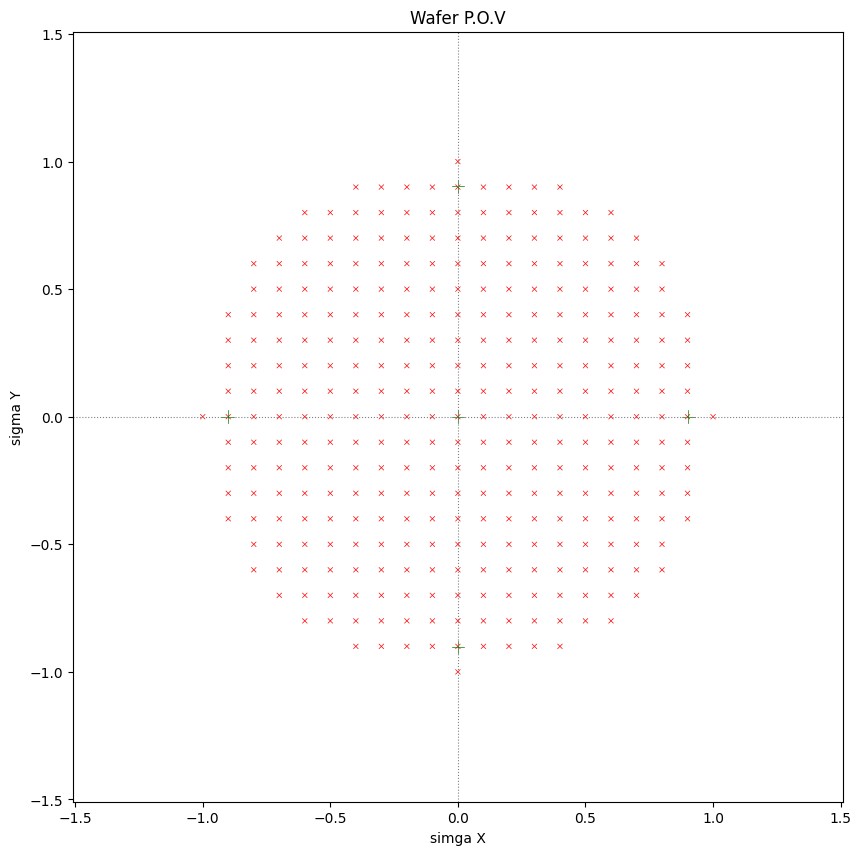

    min-max in Wafer P.O.V = ([1,0], [1,0], [-1,0], [-1,0])

* unpolarized traditional source in Mask P.O.V (k-vector)


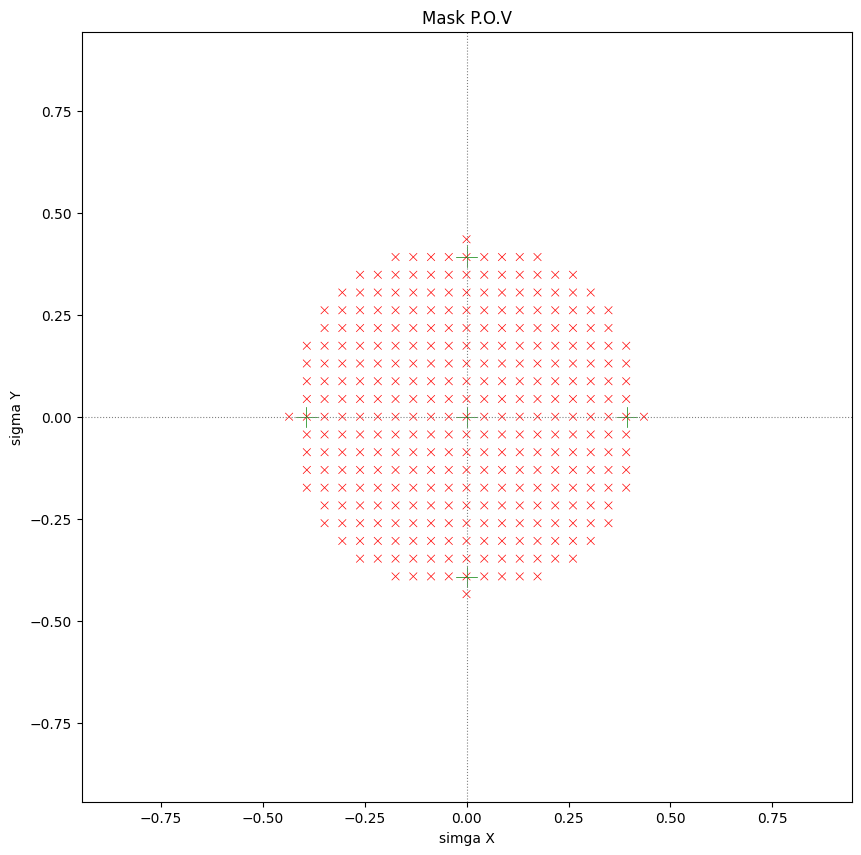

    min-max in Mask P.O.V = ([0.43499,0], [0.43499,0], [-0.43499,0], [-0.43499,0])

* totally polarized traditional source  in Wafer P.O.V


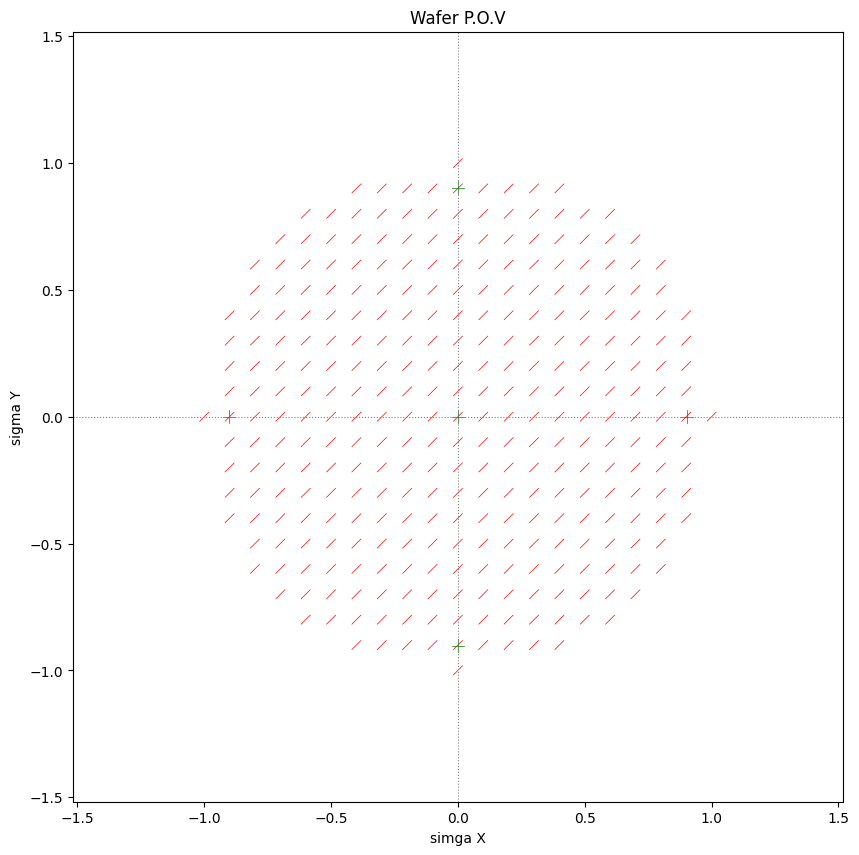

    min-max in Wafer P.O.V = ([1,0], [1,0], [-1,0], [-1,0])


In [24]:
def get_min_max(xy):
    x = [x for x, y in xy]
    y = [x for x, y in xy]
    ilx, ily = x.index(min(x)), y.index(min(y))
    iux, iuy = x.index(max(x)), y.index(max(y))
    return (xy[iux], xy[iuy], xy[ilx], xy[ily])
shift_pixel = 0
source_sampling_size = 21
assert(source_sampling_size%2 == 1)
ts = traditional_source_s()
ts.sigma = 1
ts.center_x = shift_pixel/ source_sampling_size
ts.center_y = shift_pixel/ source_sampling_size

# 
print("\n* unpolarized traditional source in Wafer P.O.V (sigmaXY)")
xy = source_grid_s.create_traditional_source(source_sampling_size, ts, 0.25*pi)
sigmaxy = xy.plot_wafer_pov(grid_info_2d)
print(f"    min-max in Wafer P.O.V = {get_min_max(sigmaxy)}")


# TODO : 靠近边界时的扭曲效应没有体现
print("\n* unpolarized traditional source in Mask P.O.V (k-vector)")
sigmaxy_in_k_vector_unit = xy.plot_mask_pov(grid_info_2d, 0, 0, wavelength, NA, M)
print(f"    min-max in Mask P.O.V = {get_min_max(sigmaxy_in_k_vector_unit)}")

# totally polarized
print("\n* totally polarized traditional source  in Wafer P.O.V")
for sp in xy.source_points:
    sp.DOP = 1
print(f"    min-max in Wafer P.O.V = {get_min_max(xy.plot_wafer_pov(grid_info_2d))}")




* Discrete source in Wafer P.O.V (sigmaXY)
    polarization is SP


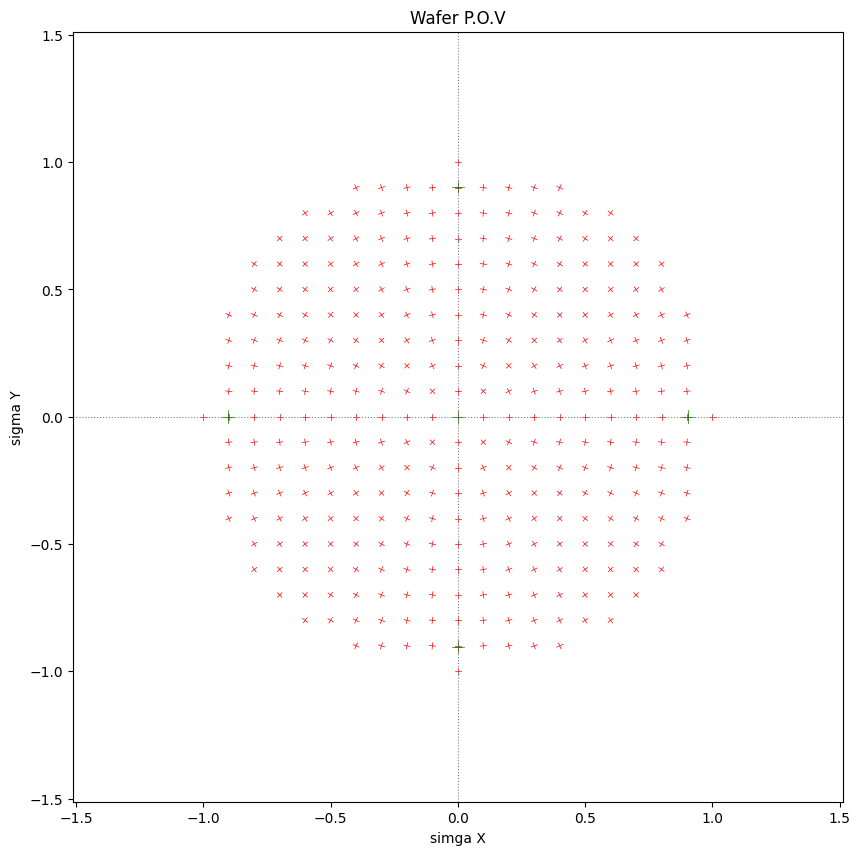

    min-max in Wafer P.O.V = ([1,0], [1,0], [-1,0], [-1,0])


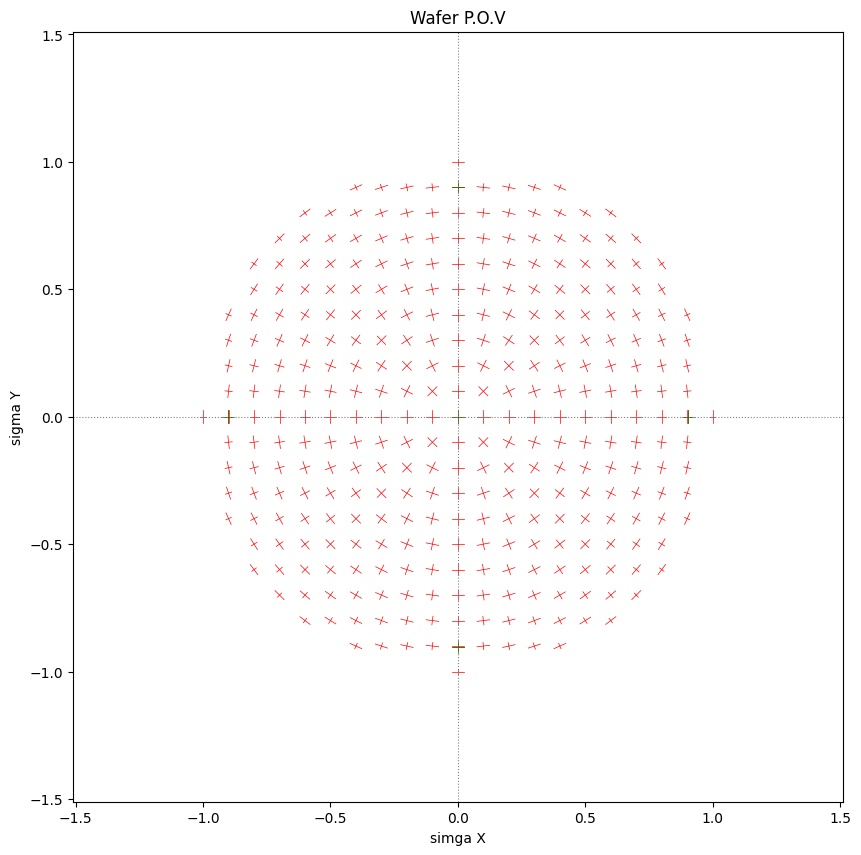

[[0.902778,0],[0.902778,0],[-0.6,0.1],[-0.6,0.1],[-0.902778,0],[-0.902778,0],[0.8,0.1],[0.8,0.1],[0,0.9],[0,0.9],[-0.4,0.9],[-0.4,0.9],[0,-0.5],[0,-0.5],[0,0],[0,0],[0,0.5],[0,0.5],[-0.7,-0.7],[-0.7,-0.7],[-0.7,0.3],[-0.7,0.3],[-0.7,0.2],[-0.7,0.2],[-0.4,0],[-0.4,0],[-0.4,0.5],[-0.4,0.5],[0,-0.9],[0,-0.9],[-0.4,-0.5],[-0.4,-0.5],[-0.7,-0.4],[-0.7,-0.4],[0.6,0.1],[0.6,0.1],[-0.7,-0.6],[-0.7,-0.6],[-0.2,-0.1],[-0.2,-0.1],[-0.4,-0.9],[-0.4,-0.9],[-0.3,0.8],[-0.3,0.8],[-0.3,-0.7],[-0.3,-0.7],[-0.3,0.3],[-0.3,0.3],[-0.3,0.2],[-0.3,0.2],[-0.3,-0.4],[-0.3,-0.4],[-0.3,-0.6],[-0.3,-0.6],[-0.1,0.8],[-0.1,0.8],[-0.1,-0.7],[-0.1,-0.7],[-0.1,0.3],[-0.1,0.3],[-0.1,0.2],[-0.1,0.2],[-0.1,-0.4],[-0.1,-0.4],[-0.5,-0.7],[-0.5,-0.7],[-0.5,0.3],[-0.5,0.3],[-0.5,0.8],[-0.5,0.8],[-0.1,-0.6],[-0.1,-0.6],[-0.5,0.2],[-0.5,0.2],[-0.5,-0.4],[-0.5,-0.4],[-0.5,-0.6],[-0.5,-0.6],[0.2,0.9],[0.2,0.9],[0.9,0.3],[0.9,0.3],[0.9,0.2],[0.9,0.2],[0.9,-0.4],[0.9,-0.4],[0.2,-0.5],[0.2,-0.5],[0.2,0],[0.2,0],[0.2,0.5],[0.2,0.5]

In [25]:
def unique_sigmaxy(sigmaxy):
    return list(map(list, set(map(tuple, sigmaxy))))
unique_sigma = unique_sigmaxy(sigmaxy)
# print(sigmaxy)

print("\n* Discrete source in Wafer P.O.V (sigmaXY)")
sp = source_grid_s(unique_sigma, xy.shape, xy.step)
print(f"    polarization is {sp.basis}")
sigmaxy = sp.plot_wafer_pov(grid_info_2d)
print(f"    min-max in Wafer P.O.V = {get_min_max(sigmaxy)}")

def create_sp(n):
    x, y = n.sigmaxy
    incidence_angle = asin(min(1, hypot(x, y) * NA))
    p = source_point_s()
    p.intensity = n.intensity * cos(incidence_angle)
    p.e_field_direction = n.e_field_direction - 0.5*pi
    p.DOP = 1
    p.sigmaxy = n.sigmaxy

    s = n
    s.DOP = 1
    return s,p
sp_list = list()
for n in sp.source_points:
    S, P = create_sp(n)
    sp_list.append(S)
    sp_list.append(P)
sp.source_points = sp_list
sp.plot_wafer_pov(grid_info_2d)




![chief_ray](../resource/source/SP-polarization.png)


* unpolarized annular source in Wafer P.O.V (sigmaXY)


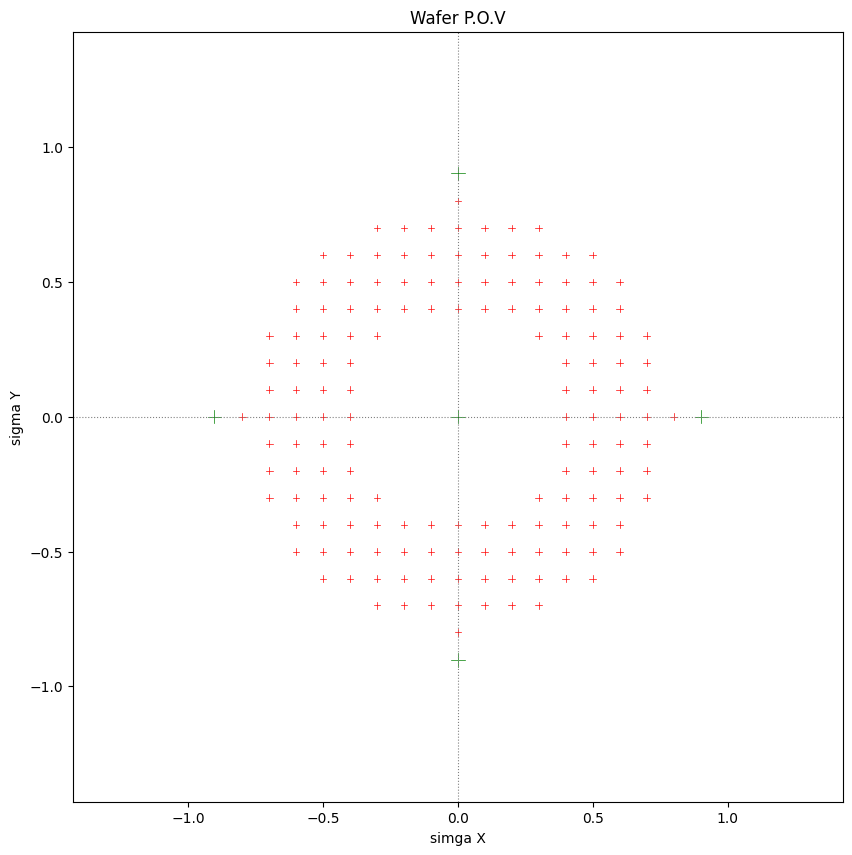


* totally TE(s) polarized annular source in Wafer P.O.V (sigmaXY)


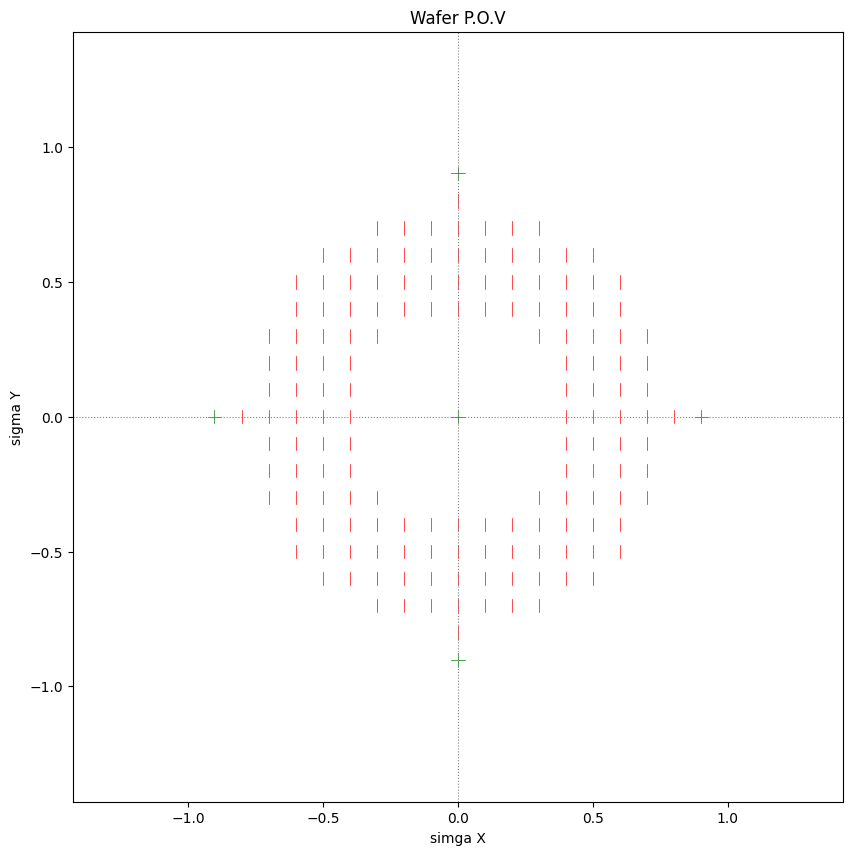


* totally TM(p) polarized annular source in Wafer P.O.V (sigmaXY)


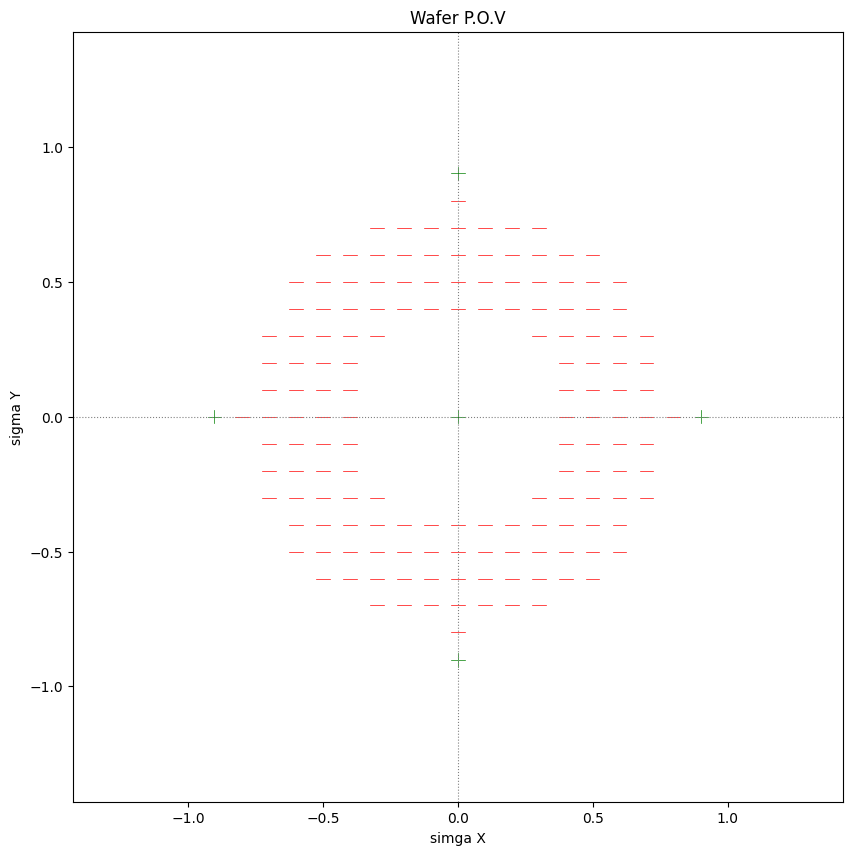

[[0,-0.8],[-0.3,-0.7],[-0.2,-0.7],[-0.1,-0.7],[0,-0.7],[0.1,-0.7],[0.2,-0.7],[0.3,-0.7],[-0.5,-0.6],[-0.4,-0.6],[-0.3,-0.6],[-0.2,-0.6],[-0.1,-0.6],[0,-0.6],[0.1,-0.6],[0.2,-0.6],[0.3,-0.6],[0.4,-0.6],[0.5,-0.6],[-0.6,-0.5],[-0.5,-0.5],[-0.4,-0.5],[-0.3,-0.5],[-0.2,-0.5],[-0.1,-0.5],[0,-0.5],[0.1,-0.5],[0.2,-0.5],[0.3,-0.5],[0.4,-0.5],[0.5,-0.5],[0.6,-0.5],[-0.6,-0.4],[-0.5,-0.4],[-0.4,-0.4],[-0.3,-0.4],[-0.2,-0.4],[-0.1,-0.4],[0,-0.4],[0.1,-0.4],[0.2,-0.4],[0.3,-0.4],[0.4,-0.4],[0.5,-0.4],[0.6,-0.4],[-0.7,-0.3],[-0.6,-0.3],[-0.5,-0.3],[-0.4,-0.3],[-0.3,-0.3],[0.3,-0.3],[0.4,-0.3],[0.5,-0.3],[0.6,-0.3],[0.7,-0.3],[-0.7,-0.2],[-0.6,-0.2],[-0.5,-0.2],[-0.4,-0.2],[0.4,-0.2],[0.5,-0.2],[0.6,-0.2],[0.7,-0.2],[-0.7,-0.1],[-0.6,-0.1],[-0.5,-0.1],[-0.4,-0.1],[0.4,-0.1],[0.5,-0.1],[0.6,-0.1],[0.7,-0.1],[-0.8,0],[-0.7,0],[-0.6,0],[-0.5,0],[-0.4,0],[0.4,0],[0.5,0],[0.6,0],[0.7,0],[0.8,0],[-0.7,0.1],[-0.6,0.1],[-0.5,0.1],[-0.4,0.1],[0.4,0.1],[0.5,0.1],[0.6,0.1],[0.7,0.1],[-0.7,0.2],[-0.6,0.2],[-0.

In [26]:
annular = annular_source_s()
annular.sigma_out = 0.8
annular.sigma_in = 0.4
annular.sigma_shift_x = annular.sigma_inner_shift_x = shift_pixel/ source_sampling_size
annular.sigma_shift_y = annular.sigma_inner_shift_x = shift_pixel/ source_sampling_size

# Y 方向作为 TE 偏振默认方向
print("\n* unpolarized annular source in Wafer P.O.V (sigmaXY)")
sp_basis = source_grid_s.create_annular_source(21, annular, 0.5 * pi, 0, 1)
sp_basis.plot_wafer_pov(grid_info_2d)

# totally  TE(s) polarized
print("\n* totally TE(s) polarized annular source in Wafer P.O.V (sigmaXY)")
for sp in sp_basis.source_points:
    sp.DOP = 1
sp_basis.plot_wafer_pov(grid_info_2d)

# totally TM(p) polarized
print("\n* totally TM(p) polarized annular source in Wafer P.O.V (sigmaXY)")
for sp in sp_basis.source_points:
    sp.e_field_direction -= 0.5 * pi
sp_basis.plot_wafer_pov(grid_info_2d)



* totally polarized quadratic source (unclockwise) in Wafer P.O.V (sigmaXY)


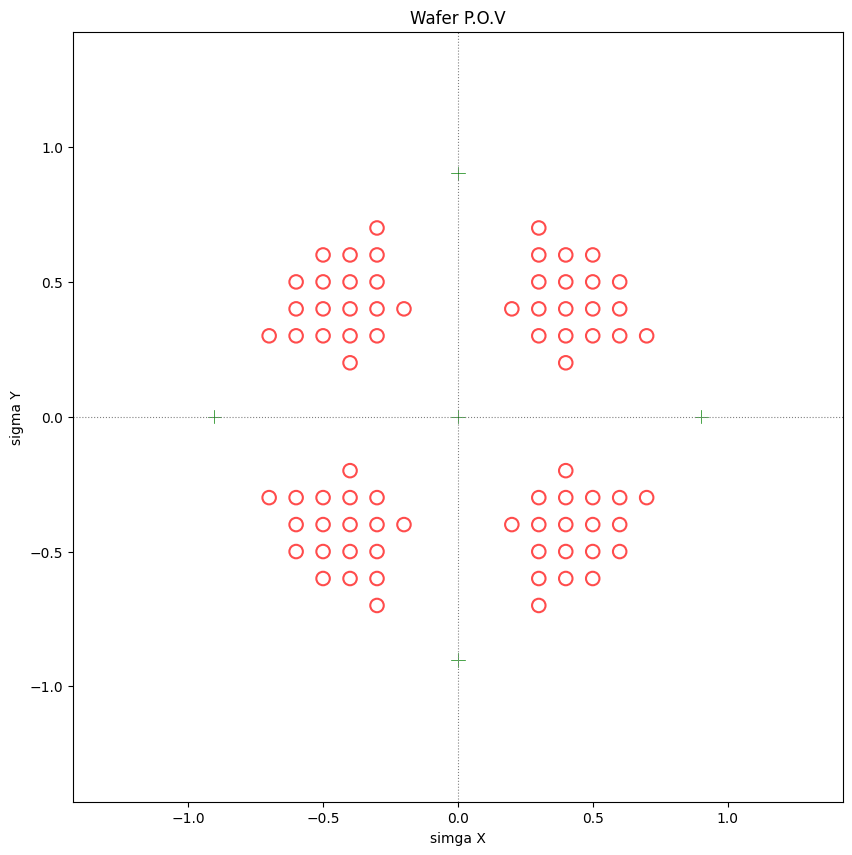


* totally polarized quadratic source (clockwise) in Wafer P.O.V (sigmaXY)


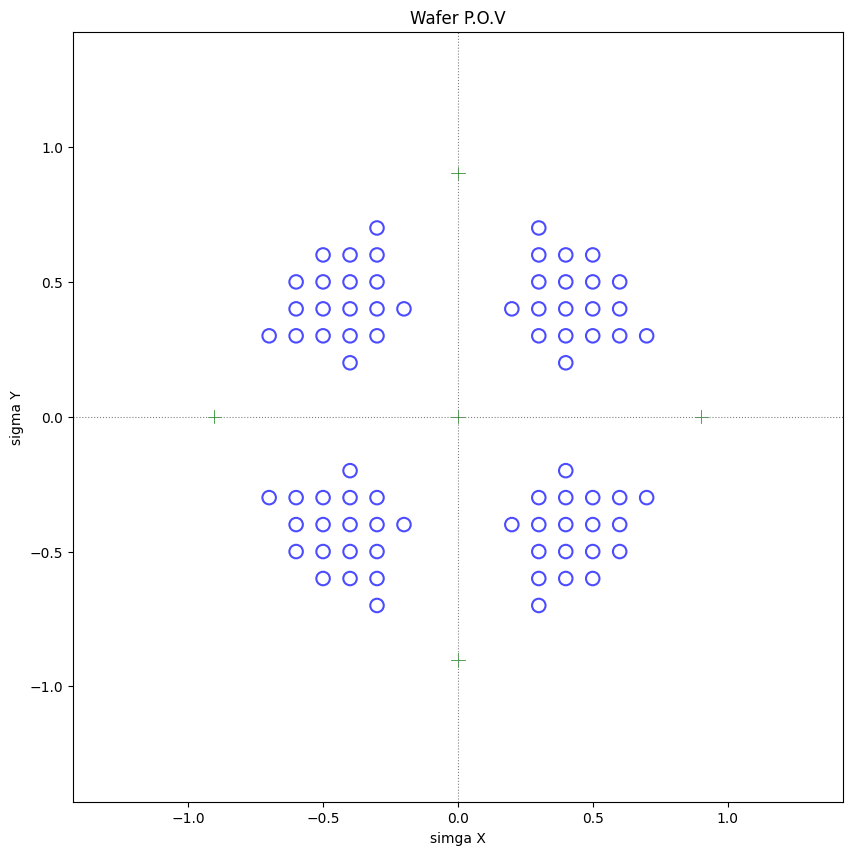

[[-0.3,-0.7],[0.3,-0.7],[-0.5,-0.6],[-0.4,-0.6],[-0.3,-0.6],[0.3,-0.6],[0.4,-0.6],[0.5,-0.6],[-0.6,-0.5],[-0.5,-0.5],[-0.4,-0.5],[-0.3,-0.5],[0.3,-0.5],[0.4,-0.5],[0.5,-0.5],[0.6,-0.5],[-0.6,-0.4],[-0.5,-0.4],[-0.4,-0.4],[-0.3,-0.4],[-0.2,-0.4],[0.2,-0.4],[0.3,-0.4],[0.4,-0.4],[0.5,-0.4],[0.6,-0.4],[-0.7,-0.3],[-0.6,-0.3],[-0.5,-0.3],[-0.4,-0.3],[-0.3,-0.3],[0.3,-0.3],[0.4,-0.3],[0.5,-0.3],[0.6,-0.3],[0.7,-0.3],[-0.4,-0.2],[0.4,-0.2],[-0.4,0.2],[0.4,0.2],[-0.7,0.3],[-0.6,0.3],[-0.5,0.3],[-0.4,0.3],[-0.3,0.3],[0.3,0.3],[0.4,0.3],[0.5,0.3],[0.6,0.3],[0.7,0.3],[-0.6,0.4],[-0.5,0.4],[-0.4,0.4],[-0.3,0.4],[-0.2,0.4],[0.2,0.4],[0.3,0.4],[0.4,0.4],[0.5,0.4],[0.6,0.4],[-0.6,0.5],[-0.5,0.5],[-0.4,0.5],[-0.3,0.5],[0.3,0.5],[0.4,0.5],[0.5,0.5],[0.6,0.5],[-0.5,0.6],[-0.4,0.6],[-0.3,0.6],[0.3,0.6],[0.4,0.6],[0.5,0.6],[-0.3,0.7],[0.3,0.7],[0,-0.902778],[0,-0.902778],[-0.902778,0],[-0.902778,0],[0,0],[0,0],[0.902778,0],[0.902778,0],[0,0.902778],[0,0.902778]]

In [27]:
quadratic = quadratic_fan_source_s()
quadratic.annular = annular
quadratic.rotate_rad = 0.25 *pi
quadratic.span_rad = 0.25 * pi

# unclockwise circle
circle = source_grid_s.create_quadratic_fan_source(21, quadratic, 0.5 * pi, 1, 1)
# totally-polarized
for sp in circle.source_points:
    sp.intensity *= 2
    sp.DOP = 1
print("\n* totally polarized quadratic source (unclockwise) in Wafer P.O.V (sigmaXY)")
circle.plot_wafer_pov(grid_info_2d)

# clockwise circle
for sp in circle.source_points:
    sp.ellipticity *= -1
print("\n* totally polarized quadratic source (clockwise) in Wafer P.O.V (sigmaXY)")
circle.plot_wafer_pov(grid_info_2d)


* totally polarized dipole leaf source (unclockwise) in Wafer P.O.V (sigmaXY)


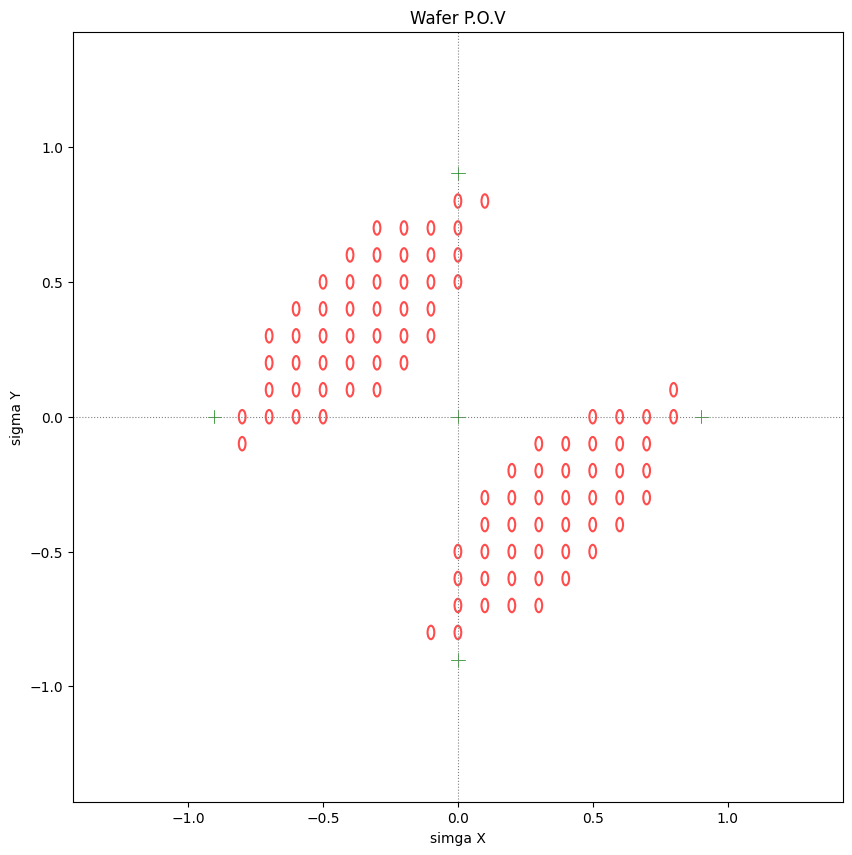


* totally polarized dipole leaf source (clockwise) in Wafer P.O.V (sigmaXY)


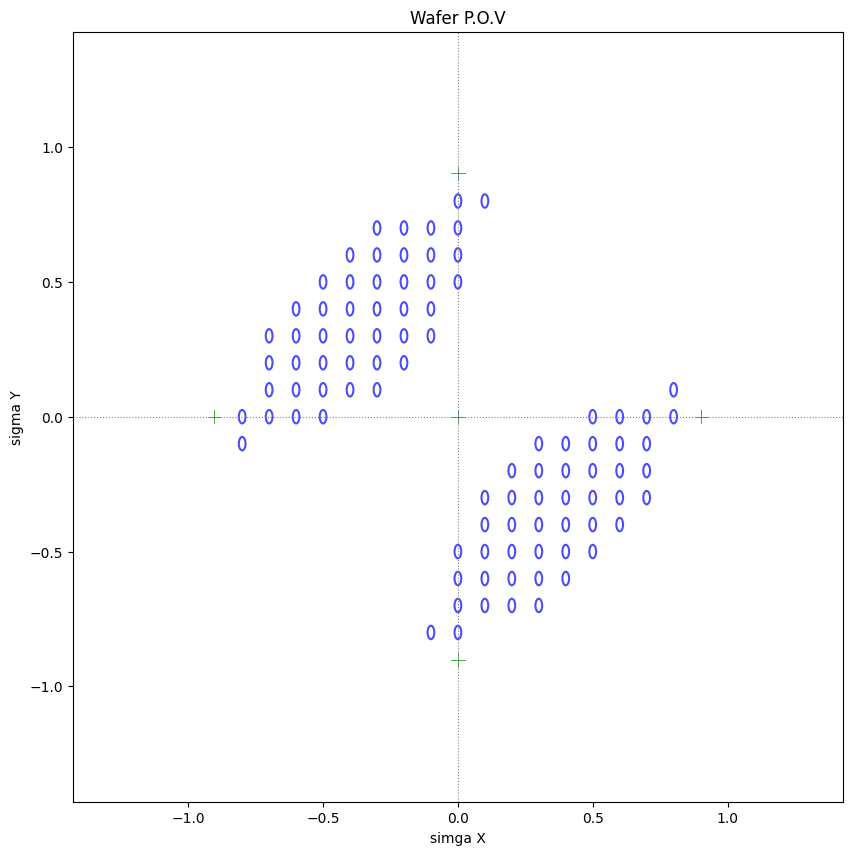

[[-0.1,-0.8],[0,-0.8],[0,-0.7],[0.1,-0.7],[0.2,-0.7],[0.3,-0.7],[0,-0.6],[0.1,-0.6],[0.2,-0.6],[0.3,-0.6],[0.4,-0.6],[0,-0.5],[0.1,-0.5],[0.2,-0.5],[0.3,-0.5],[0.4,-0.5],[0.5,-0.5],[0.1,-0.4],[0.2,-0.4],[0.3,-0.4],[0.4,-0.4],[0.5,-0.4],[0.6,-0.4],[0.1,-0.3],[0.2,-0.3],[0.3,-0.3],[0.4,-0.3],[0.5,-0.3],[0.6,-0.3],[0.7,-0.3],[0.2,-0.2],[0.3,-0.2],[0.4,-0.2],[0.5,-0.2],[0.6,-0.2],[0.7,-0.2],[-0.8,-0.1],[0.3,-0.1],[0.4,-0.1],[0.5,-0.1],[0.6,-0.1],[0.7,-0.1],[-0.8,0],[-0.7,0],[-0.6,0],[-0.5,0],[0.5,0],[0.6,0],[0.7,0],[0.8,0],[-0.7,0.1],[-0.6,0.1],[-0.5,0.1],[-0.4,0.1],[-0.3,0.1],[0.8,0.1],[-0.7,0.2],[-0.6,0.2],[-0.5,0.2],[-0.4,0.2],[-0.3,0.2],[-0.2,0.2],[-0.7,0.3],[-0.6,0.3],[-0.5,0.3],[-0.4,0.3],[-0.3,0.3],[-0.2,0.3],[-0.1,0.3],[-0.6,0.4],[-0.5,0.4],[-0.4,0.4],[-0.3,0.4],[-0.2,0.4],[-0.1,0.4],[-0.5,0.5],[-0.4,0.5],[-0.3,0.5],[-0.2,0.5],[-0.1,0.5],[0,0.5],[-0.4,0.6],[-0.3,0.6],[-0.2,0.6],[-0.1,0.6],[0,0.6],[-0.3,0.7],[-0.2,0.7],[-0.1,0.7],[0,0.7],[0,0.8],[0.1,0.8],[0,-0.902778],[0,-0.902778]

In [28]:
dipole_leaf = dipole_leaf_source_s()
# distance
dipole_leaf.sigma_D = 0.5
# thickness
dipole_leaf.sigma_d = 0.5
# rotate
dipole_leaf.rotate_rad = 0.75 * pi
dipole_leaf.sigma_shift_x = shift_pixel/ source_sampling_size
dipole_leaf.sigma_shift_y = shift_pixel/ source_sampling_size

# unclockwise circle
ellipsis = source_grid_s.create_dipole_leaf_source(21, dipole_leaf, 0.5 * pi, 0.5, 1)
# totally-polarized
for sp in ellipsis.source_points:
    sp.intensity *= 2
    sp.DOP = 1
print("\n* totally polarized dipole leaf source (unclockwise) in Wafer P.O.V (sigmaXY)")
ellipsis.plot_wafer_pov(grid_info_2d)

# clockwise circle
for sp in ellipsis.source_points:
    sp.ellipticity *= -1
print("\n* totally polarized dipole leaf source (clockwise) in Wafer P.O.V (sigmaXY)")
ellipsis.plot_wafer_pov(grid_info_2d)